## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [1]:
import numpy as np
import pandas as pd

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_df = pd.read_csv("titanic.csv") #reading excel file by path.
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
titanic_df.shape

(891, 14)

In [33]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
is_child         0
survived         0
dtype: int64

1. For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. 
You may need to use your knowledge of statiscts to analyze this data.

Survival rates by class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


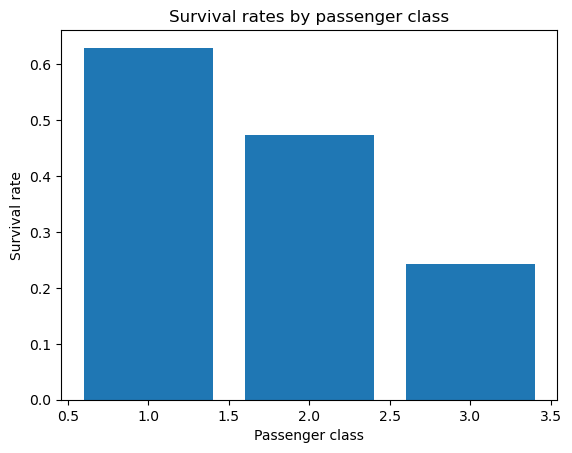

In [13]:
#Passengers in higher class cabins had a better chance of survival, as they were given priority access.

# Calculate the survival rate for passengers in each class
class_survival_rates = titanic_df.groupby('Pclass')['Survived'].mean()
print("Survival rates by class:")
print(class_survival_rates)

#plot
plt.bar(class_survival_rates.index, class_survival_rates.values)
plt.title('Survival rates by passenger class')
plt.xlabel('Passenger class')
plt.ylabel('Survival rate')
plt.show()

Survival rate for women and children: 0.69


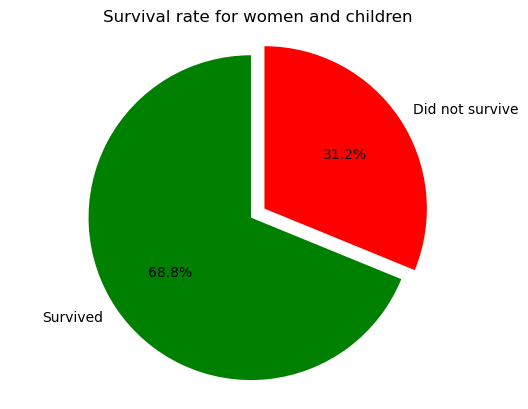

In [28]:
#Women had a higher chance of survival compared to men, that was observed during the evacuation of the ship.

# Filter the dataset to only include passengers who are female or under 18 years old
women_and_children = titanic_df[(titanic_df.Sex == 'female') | (titanic_df.Age < 18)]

# Calculate the survival rate for women and children
survival_rate = women_and_children['Survived'].mean()

print(f"Survival rate for women and children: {survival_rate:.2f}")

#plot
labels = ['Survived', 'Did not survive']
sizes = [survival_rate, 1 - survival_rate]
colors = ['green', 'red']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Survival rate for women and children')
plt.show()

In [31]:
#Children had a higher survival rate than adults.
titanic_df['is_child'] = titanic_df['Age'] < 18

# Create a new column 'survived' to indicate whether the passenger survived or not
titanic_df['survived'] = titanic_df['Survived'] == 1

# Calculate survival rate for children and adults separately
child_survival_rate = titanic_df.loc[titanic_df['is_child']]['survived'].mean()
adult_survival_rate = titanic_df.loc[~titanic_df['is_child']]['survived'].mean()

print("Survival rate for children:", child_survival_rate)
print("Survival rate for adults:", adult_survival_rate)



Survival rate for children: 0.5398230088495575
Survival rate for adults: 0.36118251928020567


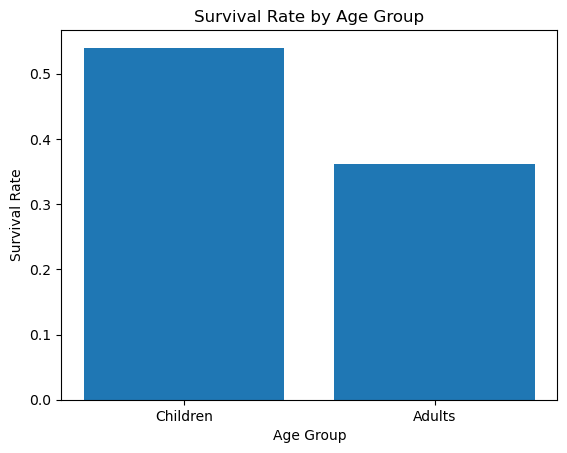

In [32]:
#plot for 3rd hypothesis.

labels = ['Children', 'Adults']
survival_rates = [child_survival_rate, adult_survival_rate]
plt.bar(labels, survival_rates)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')

# Display the plot
plt.show()

2- For each hypothesis, you need to make at least one plot.

ANSWER:
    
For each hypothesis appropriate plots have been plotted above.

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

ANSWER:
    
I have attached a pdf file named ASSIGNMENT_3_Part2_SUMMARY.pdf in which summary I have written my findings on titanic dataset.

4- Push your code and project to github and provide the link to your code here.

Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

Src
Data
Docs
Results

ANSWER:

LINK TO GITHUB: 